# Exploratory Data Analysis and Preprocessing

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from scipy.stats import pointbiserialr
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
# Load master food CSV file
menu_df = pd.read_csv('./data/menu_df.csv')

print("Restaurunt Data:", menu_df.shape)
menu_df.head()

Restaurunt Data: (700, 15)


,restaurant_name,food_name,serving_size,serving_unit,calories,carbohydrates,sugars,fats,saturated_fats,cholesterol,sodium,fiber,potassium,proteins,score
0,McDonald's Canada,Egg BLT McMuffin with Shredded Lettuce (McDona...,1.0,Serving,7.99,1.55,0.56,0.14,0.02,0.00,3.76,0.99,116.09,0.58,0.308
1,McDonald's,Cheeseburger,1.0,Serving,535.31,39.24,7.16,28.66,14.00,95.52,1176.09,2.39,443.77,30.27,0.519
2,McDonald's,Hamburger,1.0,Serving,540.14,40.27,NaN,26.56,10.52,122.04,791.00,NaN,569.52,34.28,-1.000
3,McDonald's,Honey,1.0,Serving,63.84,17.30,17.25,0.00,0.00,0.00,0.84,0.04,10.92,0.06,0.166
4,McDonald's,Hotcakes,1.0,Serving,90.80,11.32,NaN,3.88,0.85,23.60,175.60,NaN,52.80,2.56,-1.000


In [4]:
# Load master food CSV file
individual_foods_df = pd.read_csv('./data/individual_foods.csv')

print("Individual Data:", individual_foods_df.shape)
individual_foods_df.head()

Individual Data: (700, 12)


,food_name,category,description,brand,food_category,calories,carbohydrates,fiber,sugars,fats,proteins,score
0,Broccoli,Individual Foods,BROCCOLI,GREAT VALUE,Frozen Vegetables,24.0,4.71,3.5,1.18,0.00,2.35,0.356
1,Broccoli,Individual Foods,BROCCOLI,EAT SMART,Pre-Packaged Fruit & Vegetables,29.0,4.71,3.5,2.35,0.00,3.53,0.315
2,Broccoli,Individual Foods,BROCCOLI,NaN,Pre-Packaged Fruit & Vegetables,34.0,5.41,2.0,1.35,0.34,2.70,0.338
3,Broccoli,Individual Foods,BROCCOLI,MAMBO,Frozen Vegetables,29.0,3.53,2.4,1.18,0.00,1.18,0.324
4,Broccoli,Individual Foods,BROCCOLI,GOOD & GATHER,Frozen Vegetables,24.0,4.71,3.5,1.18,0.00,2.35,0.356


### Patient Data - Exploratory Data Analysis

In [5]:
# Load master patient CSV file
patient_df = pd.read_csv('./data/patient_records.csv')

print("Patient Data:",  patient_df.shape)
patient_df.head()

Patient Data: (17118, 24)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Glucose Value,Time Checked
0,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,2.0,0.0,0.0,0.0,0,11,4.0,3.0,117,2024-11-05T14:18:32
1,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,2.0,10.0,0.0,0.0,0,9,4.0,7.0,115,2024-11-05T14:13:32
2,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,5.0,0.0,30.0,1.0,1,12,3.0,4.0,114,2024-11-05T14:08:32
3,2.0,0,0.0,1,24.0,0.0,0.0,1.0,0,0,...,4.0,0.0,0.0,0.0,1,12,6.0,7.0,115,2024-11-05T14:03:33
4,2.0,0,0.0,1,33.0,1.0,0.0,0.0,1,0,...,4.0,0.0,0.0,0.0,1,6,5.0,2.0,115,2024-11-05T13:58:32


In [6]:
# Basic overview
print(patient_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17118 entries, 0 to 17117
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          17118 non-null  float64
 1   HighBP                17118 non-null  int64  
 2   HighChol              17118 non-null  float64
 3   CholCheck             17118 non-null  int64  
 4   BMI                   17118 non-null  float64
 5   Smoker                17118 non-null  float64
 6   Stroke                17118 non-null  float64
 7   HeartDiseaseorAttack  17118 non-null  float64
 8   PhysActivity          17118 non-null  int64  
 9   Fruits                17118 non-null  int64  
 10  Veggies               17118 non-null  int64  
 11  HvyAlcoholConsump     17118 non-null  int64  
 12  AnyHealthcare         17118 non-null  int64  
 13  NoDocbcCost           17118 non-null  float64
 14  GenHlth               17118 non-null  float64
 15  MentHlth           

In [7]:
# Check for missing values
print(patient_df.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Glucose Value           0
Time Checked            0
dtype: int64


In [ ]:
# Numeric columns for summary statistics
numeric_cols = ['BMI', 'Age', 'Education', 'Income', 'Glucose Value']
numeric_stats = patient_df[numeric_cols].describe().transpose()
numeric_stats.round(2)

,count,mean,std,min,25%,50%,75%,max
BMI,17118.0,32.25,7.40,13.0,27.0,31.0,36.0,87.0
Age,17118.0,9.39,2.45,1.0,8.0,10.0,11.0,13.0
Education,17118.0,4.92,0.99,1.0,4.0,5.0,6.0,6.0
Income,17118.0,6.10,2.38,1.0,5.0,6.0,8.0,11.0
Glucose Value,17118.0,132.53,44.29,46.0,103.0,122.0,153.0,318.0


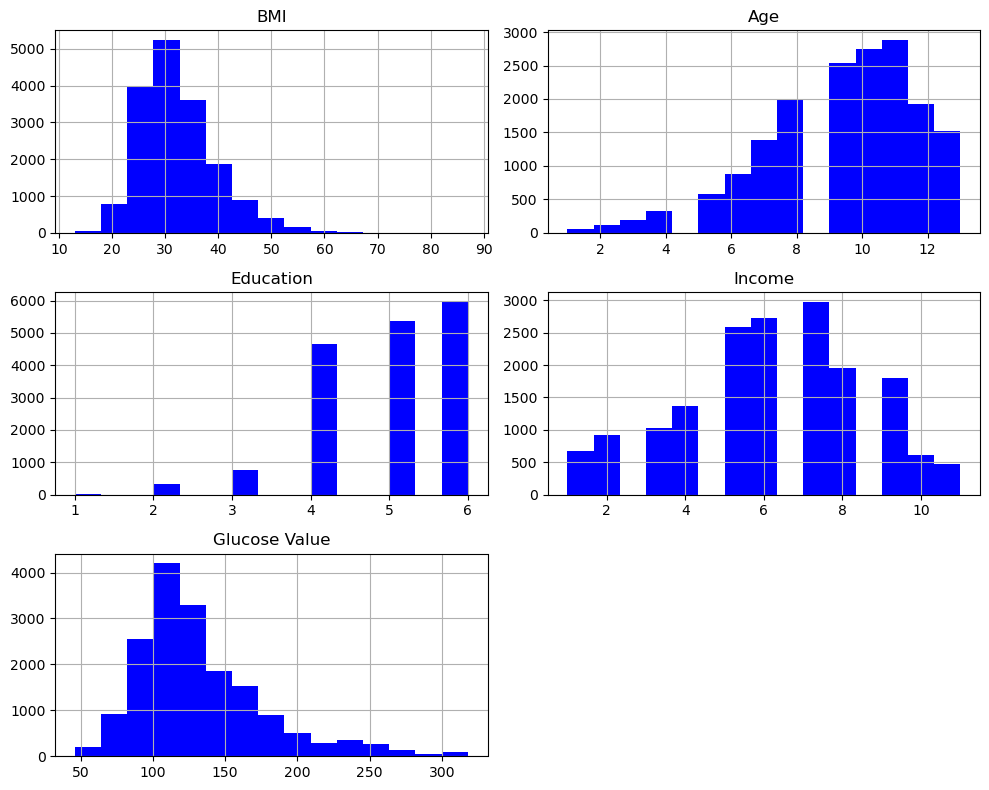

In [9]:
# Histograms for numeric columns
patient_df[numeric_cols].hist(bins=15, figsize=(10, 8), color='blue')
plt.tight_layout()
plt.show()

In [10]:
# Correlation matrix
corr_matrix = patient_df[numeric_cols].corr()
print(corr_matrix)

                    BMI       Age  Education    Income  Glucose Value
BMI            1.000000 -0.227833  -0.034396 -0.082886       0.007772
Age           -0.227833  1.000000   0.006971 -0.054528       0.019410
Education     -0.034396  0.006971   1.000000  0.412138       0.008718
Income        -0.082886 -0.054528   0.412138  1.000000      -0.000593
Glucose Value  0.007772  0.019410   0.008718 -0.000593       1.000000


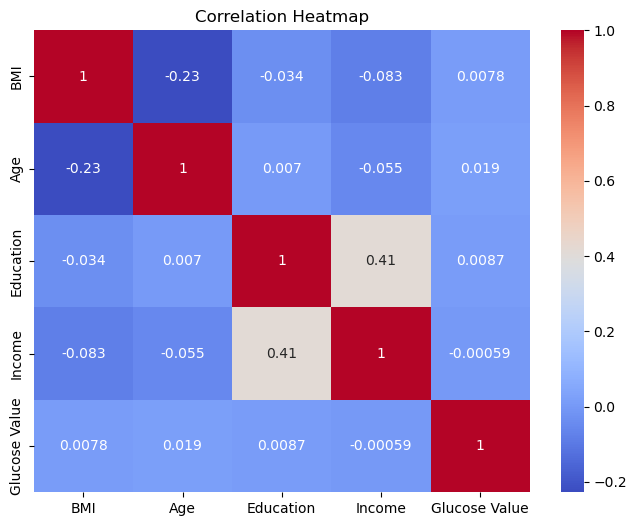

In [11]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

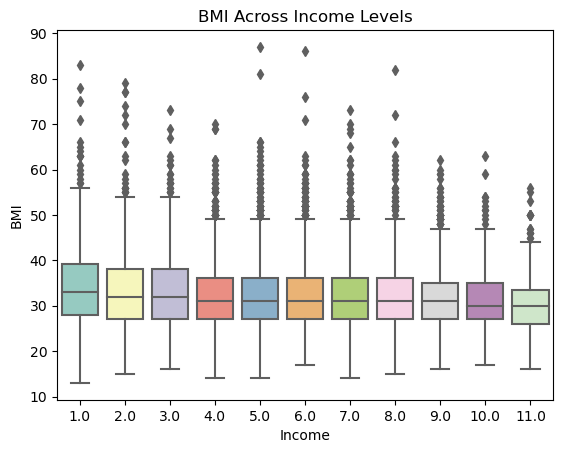

In [12]:
# Boxplot of BMI by Income
sns.boxplot(x='Income', y='BMI', data=patient_df, palette='Set3')
plt.title("BMI Across Income Levels")
plt.show()

In [ ]:
# Categorical/binary columns
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
               'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
               'NoDocbcCost', 'DiffWalk', 'Sex']

# Iterate through binary columns and print formatted value counts
for col in binary_cols:
    print(f"\n{'='*40}\nValue counts for {col}:\n{'='*40}")
    print(patient_df[col].value_counts())


Value counts for HighBP:
HighBP
1    12638
0     4480
Name: count, dtype: int64

Value counts for HighChol:
HighChol
1.0    10994
0.0     6124
Name: count, dtype: int64

Value counts for CholCheck:
CholCheck
1    17030
0       88
Name: count, dtype: int64

Value counts for Smoker:
Smoker
0.0    8887
1.0    8231
Name: count, dtype: int64

Value counts for Stroke:
Stroke
0.0    15634
1.0     1484
Name: count, dtype: int64

Value counts for HeartDiseaseorAttack:
HeartDiseaseorAttack
0.0    13616
1.0     3502
Name: count, dtype: int64

Value counts for PhysActivity:
PhysActivity
1    10812
0     6306
Name: count, dtype: int64

Value counts for Fruits:
Fruits
1    9964
0    7154
Name: count, dtype: int64

Value counts for Veggies:
Veggies
1    13429
0     3689
Name: count, dtype: int64

Value counts for HvyAlcoholConsump:
HvyAlcoholConsump
0    16631
1      487
Name: count, dtype: int64

Value counts for AnyHealthcare:
AnyHealthcare
1    16704
0      414
Name: count, dtype: int64

Value co

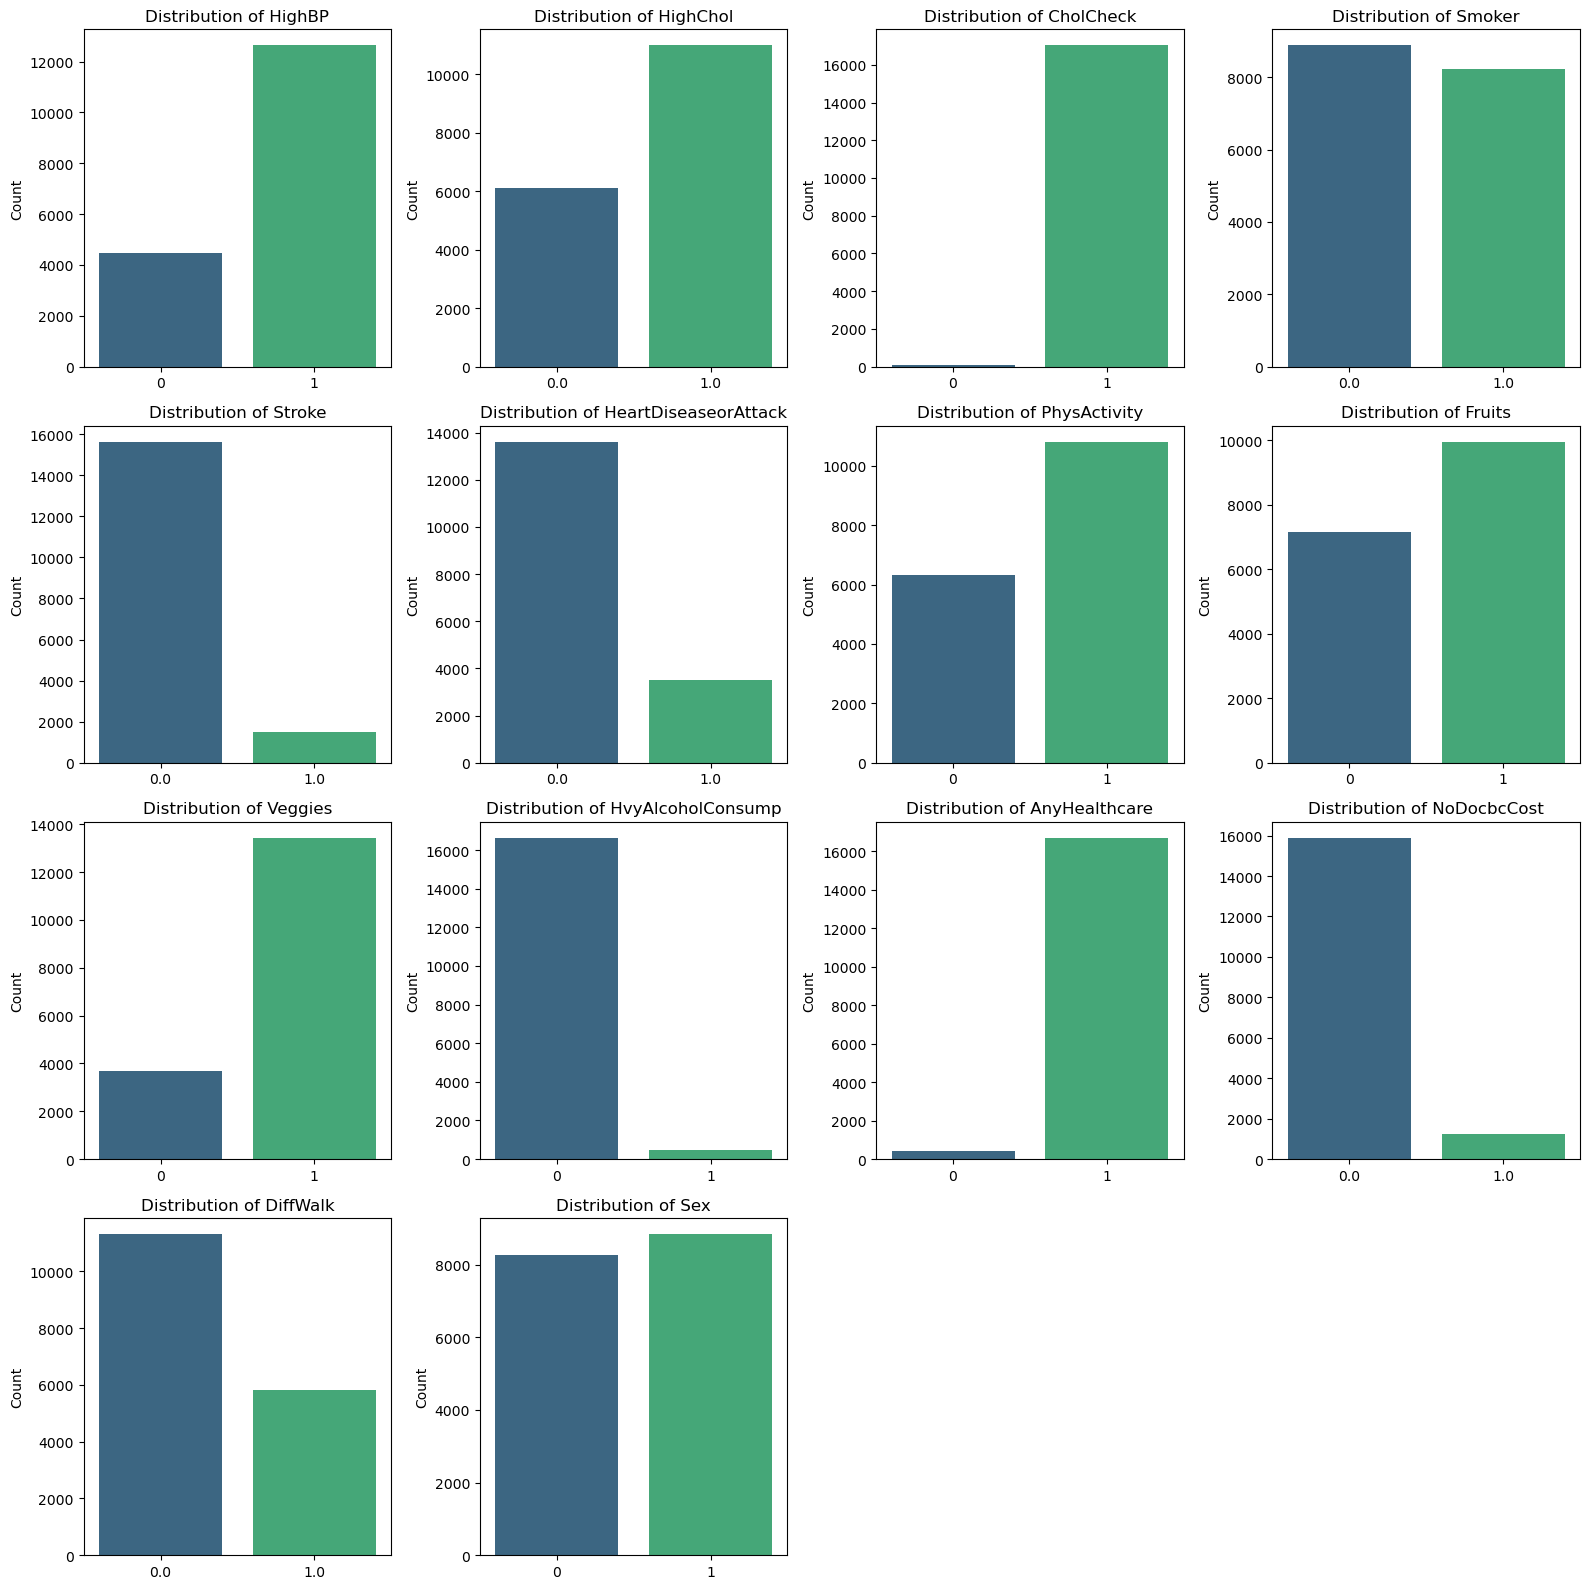

In [14]:
# Number of columns and rows
n_cols = 4
n_rows = (len(binary_cols) + n_cols - 1) // n_cols  # Ceiling division for rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate

# Plot each binary column
for i, col in enumerate(binary_cols):
    sns.countplot(x=col, data=patient_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide unused subplots

# Adjust layout and display
plt.tight_layout()
plt.show()

Correlation coefficient (corr):

This value ranges from -1 to 1 and indicates the strength and direction of the relationship between the binary feature and the continuous target variable (in this case, Glucose_Value).
Positive values indicate a positive relationship: As the binary variable increases (from 0 to 1), the continuous variable (Glucose Value) tends to increase as well.
Negative values indicate a negative relationship: As the binary variable increases (from 0 to 1), the continuous variable (Glucose Value) tends to decrease.
Values close to 0 suggest weak or no relationship: There’s little to no relationship between the binary variable and the continuous variable.
p-value (p_value):

This value tests the null hypothesis that there is no significant relationship between the binary feature and Glucose_Value.
A low p-value (typically less than 0.05) suggests that the observed correlation is statistically significant, i.e., there is a meaningful relationship between the binary variable and Glucose_Value.
A high p-value (greater than 0.05) suggests that the observed correlation is not statistically significant, i.e., the binary variable does not have a meaningful relationship with Glucose_Value.

In [ ]:
# Point-Biserial correlation for binary features vs. continuous target variable (glucose value)
for col in binary_cols:
    corr, p_value = pointbiserialr(patient_df[col], patient_df['Glucose Value'])
    print(f'Correlation between {col} and Glucose Value: {corr:.4f}, p-value = {p_value:.4f}')

Correlation between HighBP and Glucose Value: 0.0003, p-value = 0.9636
Correlation between HighChol and Glucose Value: 0.0003, p-value = 0.9695
Correlation between CholCheck and Glucose Value: -0.0068, p-value = 0.3717
Correlation between Smoker and Glucose Value: -0.0085, p-value = 0.2672
Correlation between Stroke and Glucose Value: 0.0121, p-value = 0.1120
Correlation between HeartDiseaseorAttack and Glucose Value: 0.0106, p-value = 0.1637
Correlation between PhysActivity and Glucose Value: -0.0075, p-value = 0.3296
Correlation between Fruits and Glucose Value: -0.0082, p-value = 0.2840
Correlation between Veggies and Glucose Value: -0.0047, p-value = 0.5353
Correlation between HvyAlcoholConsump and Glucose Value: 0.0046, p-value = 0.5436
Correlation between AnyHealthcare and Glucose Value: 0.0084, p-value = 0.2744
Correlation between NoDocbcCost and Glucose Value: -0.0114, p-value = 0.1346
Correlation between DiffWalk and Glucose Value: -0.0038, p-value = 0.6180
Correlation between

### Patient Data - Preprocessing

In [16]:
# Scale ordinal variables ('Age', 'Education', 'Income')
scaler = MinMaxScaler()
patient_df[['Age', 'Education', 'Income']] = scaler.fit_transform(patient_df[['Age', 'Education', 'Income']])

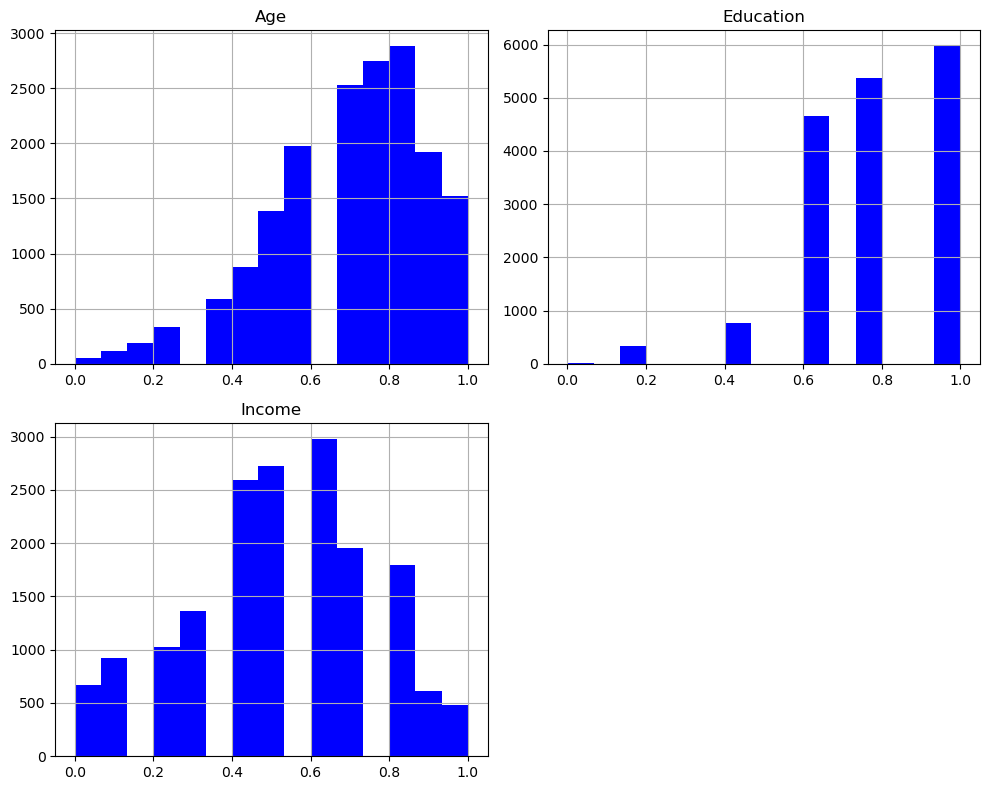

In [17]:
# Ordinal Columns
ord_cols = ['Age', 'Education', 'Income']

# Histograms to validate scaling of ordinal columns
patient_df[ord_cols].hist(bins=15, figsize=(10, 8), color='blue')
plt.tight_layout()
plt.show()

In [18]:
# Oversampling binary variable imbalances
def oversample_binary_feature(df, feature):
    """
    Oversample the binary feature in the dataset by duplicating the minority class.
    
    Parameters:
        df (pd.DataFrame): The dataset containing the feature to balance.
        feature (str): The name of the binary feature to balance.
    
    Returns:
        pd.DataFrame: The updated dataframe with a balanced binary feature.
    """
    # Separate the two classes
    class_0 = df[df[feature] == 0]
    class_1 = df[df[feature] == 1]
    
    # Determine the size of the larger class
    max_size = max(len(class_0), len(class_1))
    
    # Oversample the minority class
    if len(class_0) < len(class_1):
        class_0_resampled = class_0.sample(max_size, replace=True, random_state=42)  # Duplicate rows
        class_1_resampled = class_1
    else:
        class_0_resampled = class_0
        class_1_resampled = class_1.sample(max_size, replace=True, random_state=42)  # Duplicate rows
    
    # Combine the resampled classes
    balanced_df = pd.concat([class_0_resampled, class_1_resampled]).sample(frac=1, random_state=42)  # Shuffle rows
    
    return balanced_df

# Resample binary imbalances
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
               'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
               'NoDocbcCost', 'DiffWalk', 'Sex']

for col in binary_cols:
    patient_df = oversample_binary_feature(patient_df, col)

# Check value counts for all binary features
for col in binary_cols:
    print(f"{col} distribution:\n{patient_df[col].value_counts()}\n")

HighBP distribution:
HighBP
0    673232
1    393966
Name: count, dtype: int64

HighChol distribution:
HighChol
1.0    648581
0.0    418617
Name: count, dtype: int64

CholCheck distribution:
CholCheck
0    628374
1    438824
Name: count, dtype: int64

Smoker distribution:
Smoker
1.0    691597
0.0    375601
Name: count, dtype: int64

Stroke distribution:
Stroke
1.0    582581
0.0    484617
Name: count, dtype: int64

HeartDiseaseorAttack distribution:
HeartDiseaseorAttack
1.0    605225
0.0    461973
Name: count, dtype: int64

PhysActivity distribution:
PhysActivity
1    640641
0    426557
Name: count, dtype: int64

Fruits distribution:
Fruits
0    684084
1    383114
Name: count, dtype: int64

Veggies distribution:
Veggies
0    594824
1    472374
Name: count, dtype: int64

HvyAlcoholConsump distribution:
HvyAlcoholConsump
0    744162
1    323036
Name: count, dtype: int64

AnyHealthcare distribution:
AnyHealthcare
1    677249
0    389949
Name: count, dtype: int64

NoDocbcCost distribution:
N

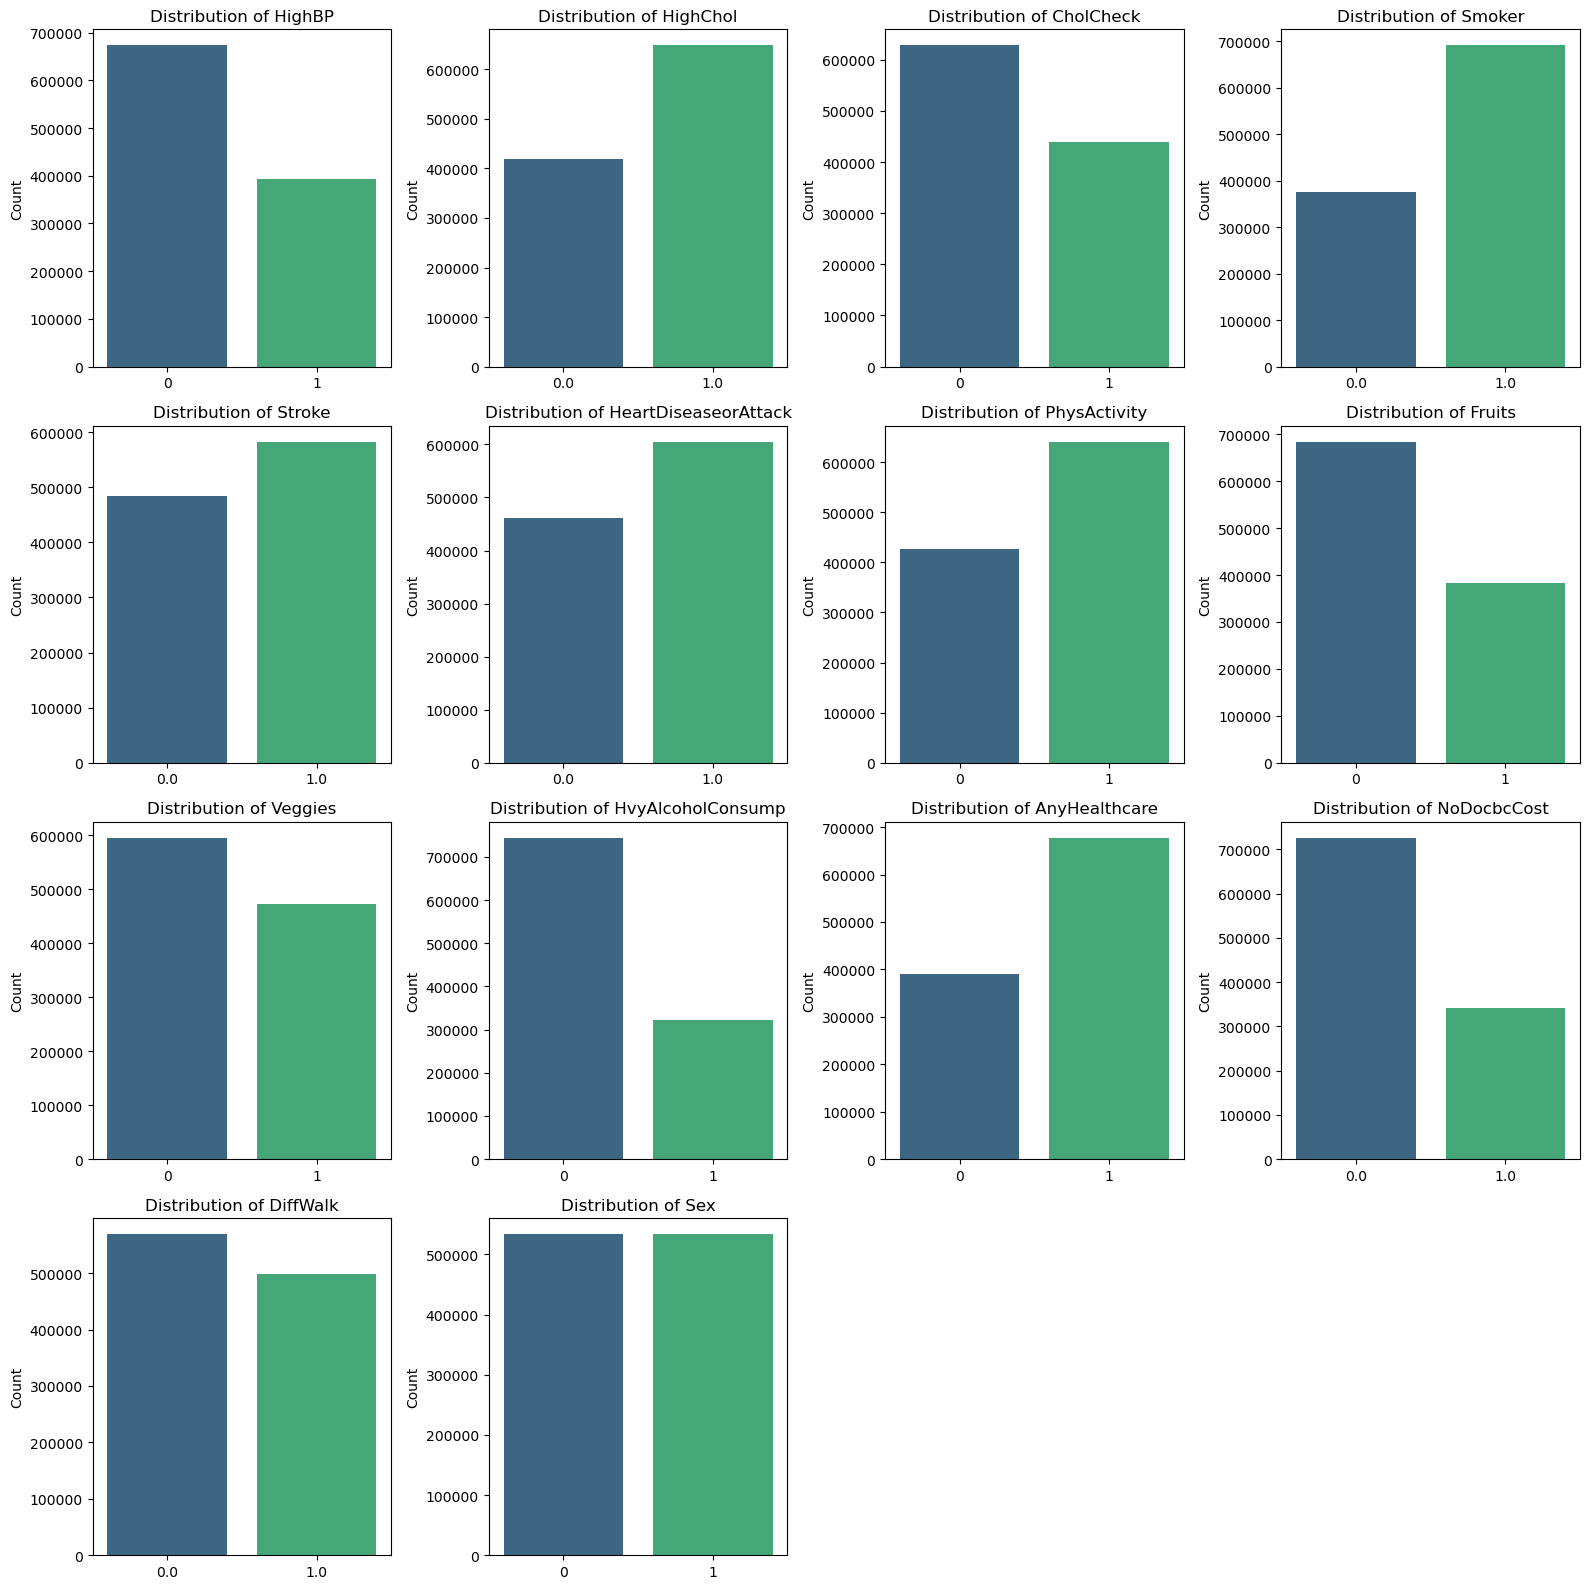

In [19]:
# Validate balancing
# Number of columns and rows
n_cols = 4
n_rows = (len(binary_cols) + n_cols - 1) // n_cols  # Ceiling division for rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate

# Plot each binary column
for i, col in enumerate(binary_cols):
    sns.countplot(x=col, data=patient_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide unused subplots

# Adjust layout and display
plt.tight_layout()
plt.show()

### Feature Importance of Patient Data

In [24]:
numeric_cols = ['BMI', 'Glucose Value']

# Separate the columns into their respective categories
binary_data = patient_df[binary_cols]
ordinal_data = patient_df[ord_cols]
numeric_data = patient_df[numeric_cols]

# Scale the numeric data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Convert scaled numeric data to a DataFrame
numeric_data_scaled_df = pd.DataFrame(numeric_data_scaled, columns=numeric_cols, index=patient_df.index)

# Combine all preprocessed data
preprocessed_data = pd.concat([binary_data, ordinal_data, numeric_data_scaled_df], axis=1)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Example: 3 clusters
clusters = kmeans.fit_predict(preprocessed_data)

# Add the cluster labels back to the original dataframe
patient_df['Cluster'] = clusters

# Visualize the results
plt.scatter(patient_df['BMI'], patient_df['Age'], c=patient_df['Cluster'], cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

c:\Users\lvand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [19]:
# Drop the 'displayTime' column
patient_df_no_time = patient_df.drop(columns=['Time Checked'])

# Elbow Method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(patient_df_no_time)  # Use the dataframe without 'displayTime'
    inertia.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\lvand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'